# Feature Engineering

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt

plt.rcParams['figure.figsize'] = [16, 10]

In [10]:
%matplotlib inline

In [11]:
df = pd.read_csv('train.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [14]:
df['vendor_id'] = df['vendor_id'].astype('object')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  object        
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 122.4+ MB


In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


## Remove Outliers

As you can see above, the min value of trip_duration is as low as 1 second while the max value of trip_duration is as high as 3526282.000, which is over 900 hours, both these cases are not reasonable and considered as outliers.

In [18]:
m = np.mean(df['trip_duration'])
std = np.std(df['trip_duration'])
df = df[df['trip_duration'] <= m+3*std]
df = df[df['trip_duration'] >= m-3*std]

In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1456571,1456571,1456571.000,1456571.000,1456571.000,1456571.000,1456571.000,1456571.000
mean,2016-04-01 10:08:09.154976,2016-04-01 10:22:06.273138432,1.664,-73.973,40.751,-73.973,40.752,837.118
min,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,2016-02-17 16:43:58,2016-02-17 17:00:10.500000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2016-04-01 17:17:17,2016-04-01 17:31:53,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2016-05-15 03:55:13.500000,2016-05-15 04:06:08.500000,2.000,-73.967,40.768,-73.963,40.770,1073.000
max,2016-06-30 23:59:39,2016-07-01 00:48:20,9.000,-61.336,51.881,-61.336,43.921,15900.000
std,NaN,NaN,1.314,0.071,0.033,0.071,0.036,661.366


/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-12.805555555555548, 0.5, 'number of training records')

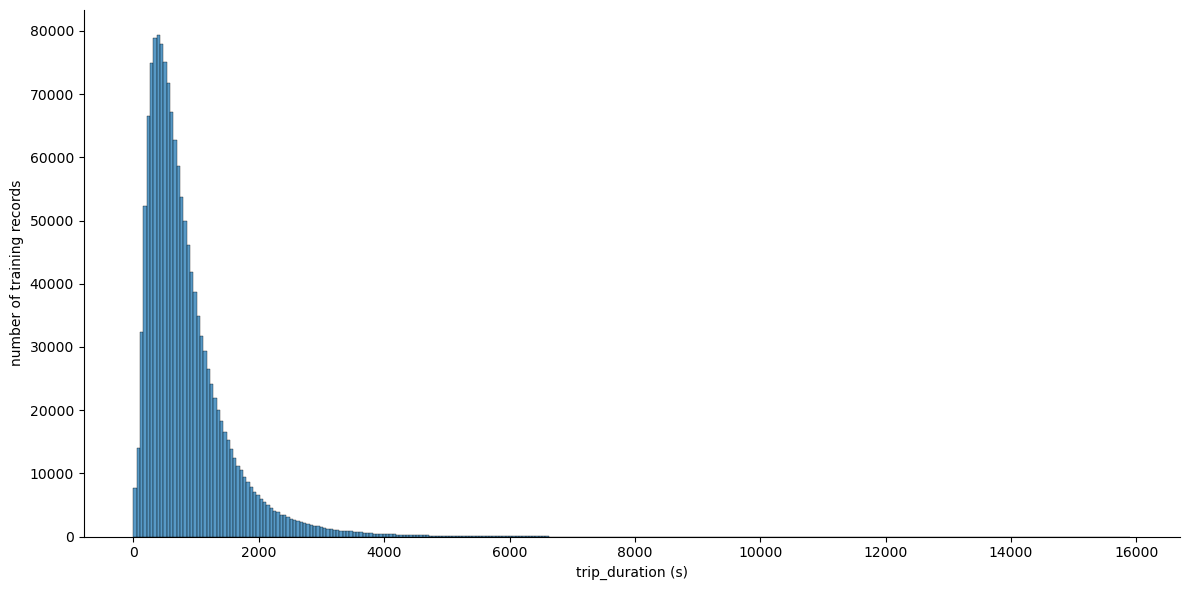

In [22]:
sns.displot(df,
           x='trip_duration',
           bins=300,
           height=6, 
           aspect=2)
plt.xlabel('trip_duration (s)')
plt.ylabel('number of training records')

## Time-related Features Extraction

Create new features from datetime

In [23]:
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_month'] = df['pickup_datetime'].dt.month
# df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_dow'] = df['pickup_datetime'].dt.dayofweek
df['pickup_dayofmonth'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [25]:
df.head().transpose()

,0,1,2,3,4
id,id2875421,id2377394,id3858529,id3504673,id2181028
vendor_id,2,1,2,2,2
pickup_datetime,2016-03-14 17:24:55,2016-06-12 00:43:35,2016-01-19 11:35:24,2016-04-06 19:32:31,2016-03-26 13:30:55
dropoff_datetime,2016-03-14 17:32:30,2016-06-12 00:54:38,2016-01-19 12:10:48,2016-04-06 19:39:40,2016-03-26 13:38:10
passenger_count,1,1,1,1,1
pickup_longitude,-73.982,-73.980,-73.979,-74.010,-73.973
pickup_latitude,40.768,40.739,40.764,40.720,40.793
dropoff_longitude,-73.965,-73.999,-74.005,-74.012,-73.973
dropoff_latitude,40.766,40.731,40.710,40.707,40.783
store_and_fwd_flag,N,N,N,N,N


In [28]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
pickup_datetime,1456571,2016-04-01 10:08:09.154976,2016-01-01 00:00:17,2016-02-17 16:43:58,2016-04-01 17:17:17,2016-05-15 03:55:13.500000,2016-06-30 23:59:39,NaN
dropoff_datetime,1456571,2016-04-01 10:22:06.273138432,2016-01-01 00:03:31,2016-02-17 17:00:10.500000,2016-04-01 17:31:53,2016-05-15 04:06:08.500000,2016-07-01 00:48:20,NaN
passenger_count,1456571.000,1.664,0.000,1.000,1.000,2.000,9.000,1.314
pickup_longitude,1456571.000,-73.973,-121.933,-73.992,-73.982,-73.967,-61.336,0.071
pickup_latitude,1456571.000,40.751,34.360,40.737,40.754,40.768,51.881,0.033
dropoff_longitude,1456571.000,-73.973,-121.933,-73.991,-73.980,-73.963,-61.336,0.071
dropoff_latitude,1456571.000,40.752,32.181,40.736,40.755,40.770,43.921,0.036
trip_duration,1456571.000,837.118,1.000,397.000,662.000,1073.000,15900.000,661.366
pickup_month,1456571.000,3.517,1.000,2.000,4.000,5.000,6.000,1.681
pickup_dow,1456571.000,3.050,0.000,1.000,3.000,5.000,6.000,1.954


<Axes: xlabel='pickup_date', ylabel='trip_duration'>

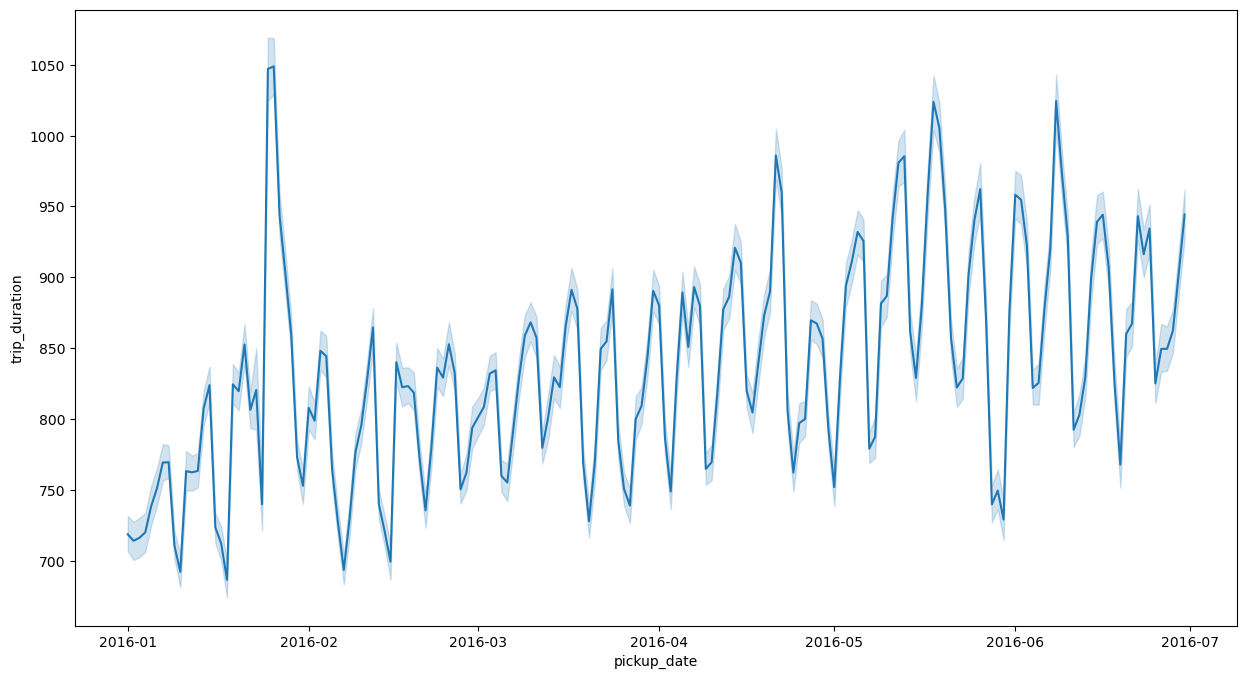

In [29]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='pickup_date',
            y='trip_duration',
            data=df)

In [31]:
df['IsWeekend'] = df['pickup_dow'] > 4

<Axes: xlabel='pickup_date', ylabel='trip_duration'>

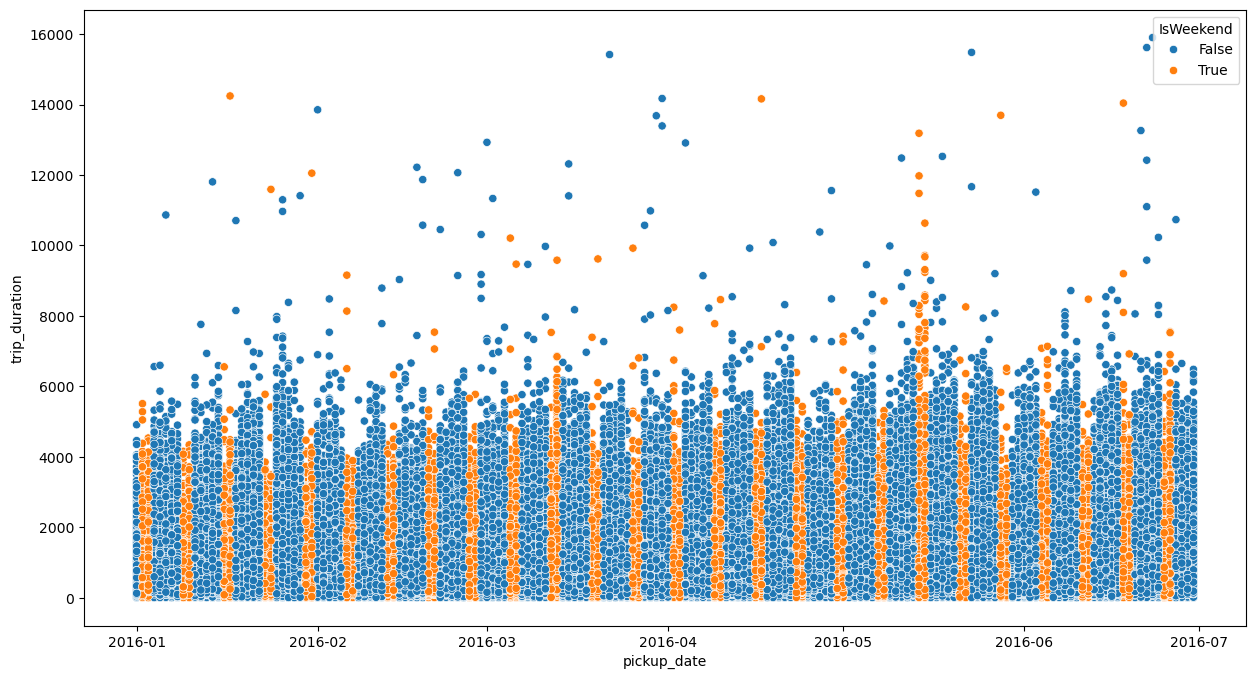

In [34]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'pickup_date',
               y = 'trip_duration',
                data = df,
               hue = 'IsWeekend')

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


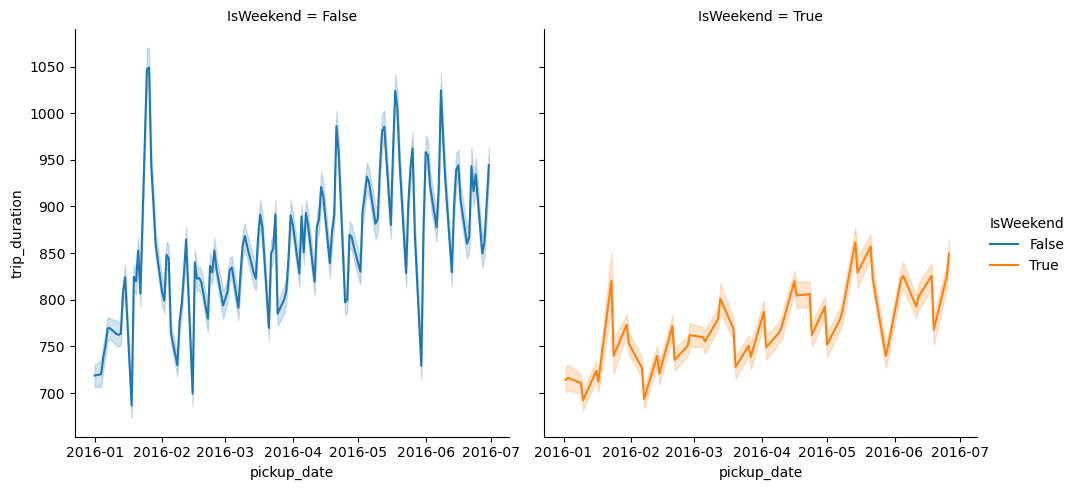

In [36]:
sns.relplot(x = 'pickup_date',
           y = 'trip_duration',
           data = df,
           kind = 'line',
           col = 'IsWeekend',
           hue = 'IsWeekend')

We can also further extract information from hour to see the trip is in the morning, afternoon, evening or late night.

In [37]:
def time_of_day(x):
    if x in range(6, 12):
        return 'Morning'
    elif x in range(12, 16):
        return 'Afternoon'
    elif x in range(16, 22):
        return 'Evening'
    else:
        return 'Late Night'

In [38]:
df['pickup_tod'] = df['pickup_hour'].apply(time_of_day)

In [39]:
df[['pickup_date', 'pickup_hour', 'pickup_tod']].head()

,pickup_date,pickup_hour,pickup_tod
0,2016-03-14,17,Evening
1,2016-06-12,0,Late Night
2,2016-01-19,11,Morning
3,2016-04-06,19,Evening
4,2016-03-26,13,Afternoon


<Axes: xlabel='pickup_hour', ylabel='count'>

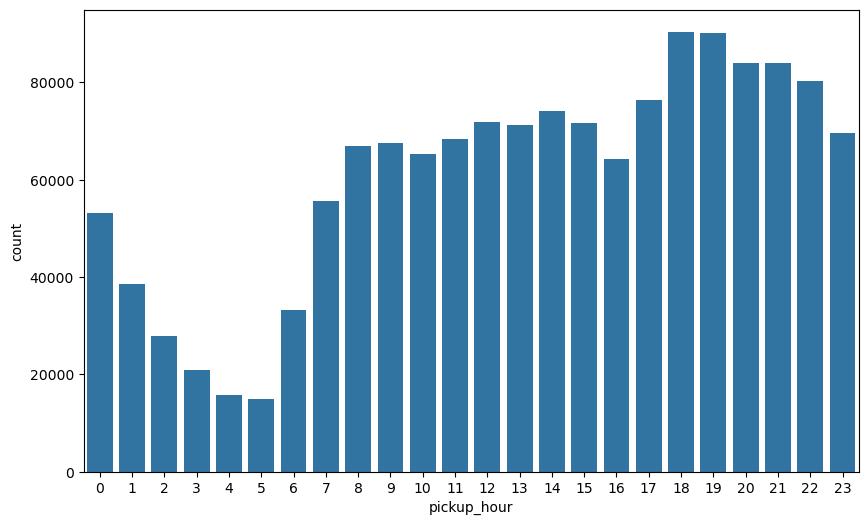

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour',
             data=df)

<Axes: xlabel='pickup_tod', ylabel='count'>

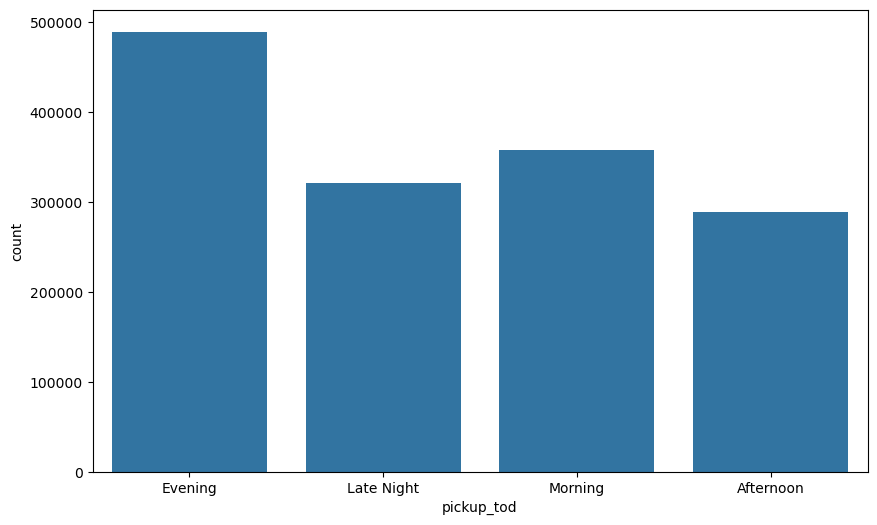

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_tod',
             data=df)

<Axes: xlabel='pickup_dow', ylabel='count'>

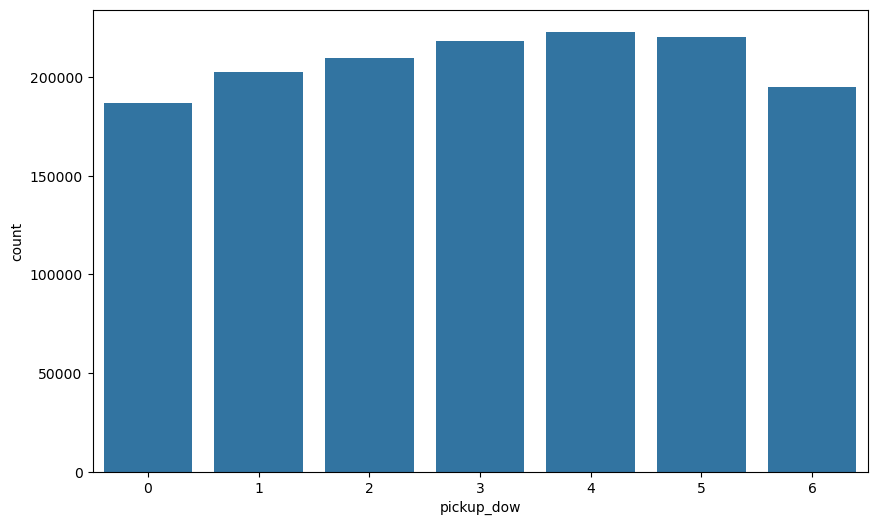

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_dow',
             data=df)

## Distance and Directionality Features Extraction

In [48]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat*0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng*0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [45]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

In [51]:
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    return np.degrees(np.arctan2(y, x))

In [49]:
df.loc[:, 'distance_haversine'] = haversine_array(
    df['pickup_latitude'].values, df['pickup_longitude'].values,
    df['dropoff_latitude'].values, df['dropoff_longitude'].values
)

In [50]:
df.loc[:, 'distance_manhattan'] = dummy_manhattan_distance(
    df['pickup_latitude'].values, df['pickup_longitude'].values,
    df['dropoff_latitude'].values, df['dropoff_longitude'].values
)

In [52]:
df.loc[:, 'direction'] = bearing_array(
    df['pickup_latitude'].values, df['pickup_longitude'].values,
    df['dropoff_latitude'].values, df['dropoff_longitude'].values
)

##### Center Lng and center Lat between two points

In [53]:
df.loc[:, 'center_latitude'] = (df['pickup_latitude'].values + df['dropoff_latitude'].values) / 2
df.loc[:, 'center_longitude'] = (df['pickup_longitude'].values + df['dropoff_longitude'].values) / 2

In [54]:
df.head().transpose()

,0,1,2,3,4
id,id2875421,id2377394,id3858529,id3504673,id2181028
vendor_id,2,1,2,2,2
pickup_datetime,2016-03-14 17:24:55,2016-06-12 00:43:35,2016-01-19 11:35:24,2016-04-06 19:32:31,2016-03-26 13:30:55
dropoff_datetime,2016-03-14 17:32:30,2016-06-12 00:54:38,2016-01-19 12:10:48,2016-04-06 19:39:40,2016-03-26 13:38:10
passenger_count,1,1,1,1,1
pickup_longitude,-73.982,-73.980,-73.979,-74.010,-73.973
pickup_latitude,40.768,40.739,40.764,40.720,40.793
dropoff_longitude,-73.965,-73.999,-74.005,-74.012,-73.973
dropoff_latitude,40.766,40.731,40.710,40.707,40.783
store_and_fwd_flag,N,N,N,N,N


In [56]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
pickup_datetime,1456571,2016-04-01 10:08:09.154976,2016-01-01 00:00:17,2016-02-17 16:43:58,2016-04-01 17:17:17,2016-05-15 03:55:13.500000,2016-06-30 23:59:39,NaN
dropoff_datetime,1456571,2016-04-01 10:22:06.273138432,2016-01-01 00:03:31,2016-02-17 17:00:10.500000,2016-04-01 17:31:53,2016-05-15 04:06:08.500000,2016-07-01 00:48:20,NaN
passenger_count,1456571.000,1.664,0.000,1.000,1.000,2.000,9.000,1.314
pickup_longitude,1456571.000,-73.973,-121.933,-73.992,-73.982,-73.967,-61.336,0.071
pickup_latitude,1456571.000,40.751,34.360,40.737,40.754,40.768,51.881,0.033
dropoff_longitude,1456571.000,-73.973,-121.933,-73.991,-73.980,-73.963,-61.336,0.071
dropoff_latitude,1456571.000,40.752,32.181,40.736,40.755,40.770,43.921,0.036
trip_duration,1456571.000,837.118,1.000,397.000,662.000,1073.000,15900.000,661.366
pickup_month,1456571.000,3.517,1.000,2.000,4.000,5.000,6.000,1.681
pickup_dow,1456571.000,3.050,0.000,1.000,3.000,5.000,6.000,1.954


In [57]:
df[df['distance_haversine'] > 100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_dow,pickup_dayofmonth,pickup_hour,IsWeekend,pickup_tod,distance_haversine,distance_manhattan,direction,center_latitude,center_longitude
14502,id1092161,1,2016-04-15 22:35:08,2016-04-16 00:34:21,1,-73.782,40.645,-72.711,41.312,N,...,4,15,22,False,Late Night,116.496,164.454,50.123,40.978,-73.247
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.810,51.881,-73.987,40.751,N,...,5,7,18,True,Evening,1240.909,1318.480,-175.386,46.316,-73.398
275644,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354,34.712,-73.835,32.181,N,...,2,24,16,False,Evening,314.764,420.325,152.972,33.447,-74.595
283102,id2778014,2,2016-01-17 16:43:09,2016-01-17 16:50:16,1,-73.997,40.729,-72.671,40.614,N,...,6,17,16,True,Evening,112.549,124.482,96.075,40.672,-73.334
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007,40.717,-76.963,38.946,N,...,5,2,20,True,Evening,320.126,446.064,-127.006,39.832,-75.485
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.871,40.774,-79.818,38.964,N,...,3,28,13,False,Afternoon,545.853,701.945,-109.701,39.869,-76.844
512980,id2066082,1,2016-01-25 23:53:17,2016-01-26 01:25:46,1,-73.878,40.772,-72.906,41.320,N,...,0,25,23,False,Late Night,101.736,142.734,52.914,41.046,-73.392
595540,id1723416,1,2016-03-20 21:07:56,2016-03-20 21:12:35,1,-78.547,40.817,-79.786,40.918,N,...,6,20,21,True,Evening,104.760,115.417,-83.471,40.867,-79.167
644165,id0401529,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.981,40.757,-74.240,38.478,N,...,3,2,15,False,Afternoon,254.364,275.233,-174.908,39.618,-74.110
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.990,40.757,-70.346,36.398,N,...,0,15,18,False,Evening,578.843,791.539,145.680,38.577,-72.168


Let's remove those data with haversine distance larger than 100, which is considered as outliers.

In [58]:
df = df[df['distance_haversine'] < 100]

<Axes: xlabel='distance_manhattan', ylabel='trip_duration'>

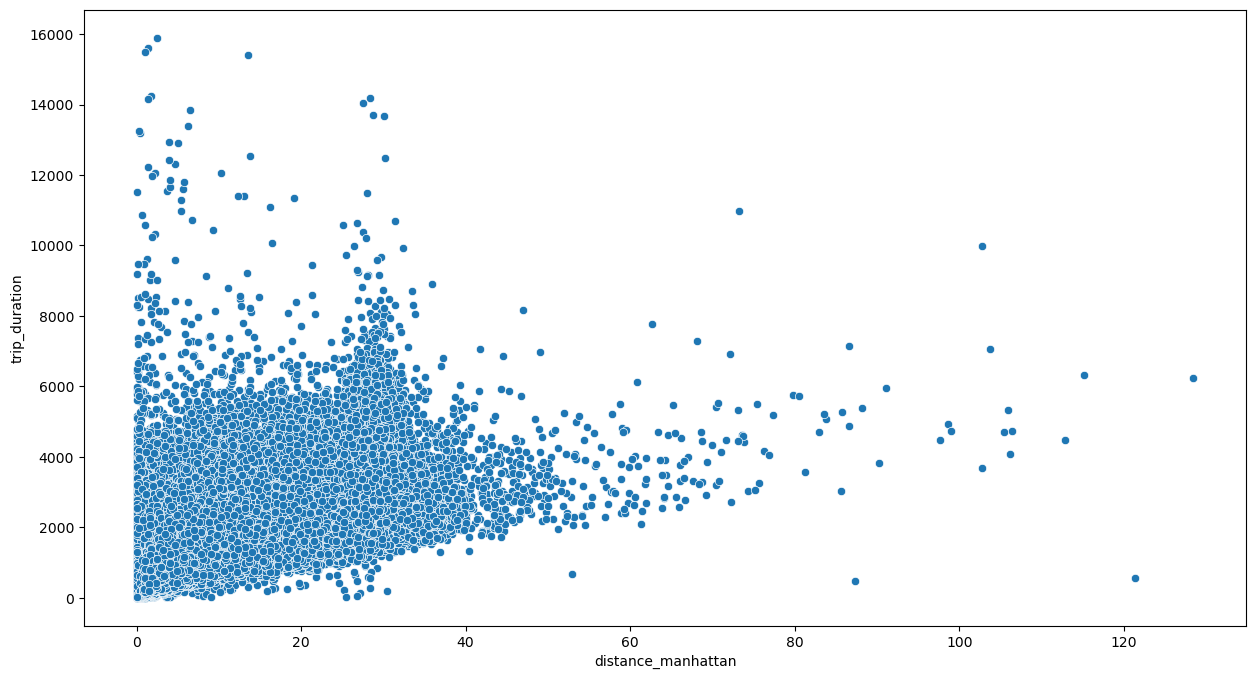

In [66]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'distance_manhattan',
               y = 'trip_duration', 
               data = df)

## Categorical Encoding

Categorical Encoding is a process of converting categories into numbers.   (categorical to numerical)

* Some machine learning algorithms can work directly with categorical data depending on implementation, such as decision tree
* but most require any inputs or outputs variables to be a number, or numeric in value. This means that any categorical data must be mapped to numeric data.

### Label Encoding
    In many scenarios, the categorical data might not have a order or rank, however, when the label encoding is performed, the country names are ranked based on the Alphabet. Therefore, there's a high probability that the model captures the relationship between countries such as India < Japan < US, which is not we want.

### One-hot Encoding
    With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

* Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.
* One-hot encoding is very useful for data that has no relationship to each other.

### When to use label encoding and one-hot encoding
    Label Encoding: 1) The categorical feature is ordinal (e.g. junior, senior, primary, high school)
                    2) The number of categories is quite large as one-hot encoding can lead to high memory consumption.

                    drawbacks: does not work with non-ordinal categorical features
                    
    One-hot Encoding: 1) The categorical feature is not ordinal (e.g. countries)
                      2) The number of categories is less so one-hot can be effectively applied.

                      drawbacks: leads to a humongus number of added features when your data contains a large number of categories.

### Target Encoding
    Target encoding is also known as mean encoding. With target encoding, each category is replaced with the mean target value for samples having that category. The target value is the y variable or the value our model is trying to predict. This allows us to encode an arbitrary number of categories without increasing the dimensionality of data.

Use get_dummies() to get one-hot encoding. One-hot encoding is suitable for features without ordinal.

In [67]:
df['vendor_id'].value_counts()

vendor_id
2    778234
1    678320
Name: count, dtype: int64

In [70]:
vendor_df = pd.get_dummies(df['vendor_id'], prefix='vendorId', prefix_sep='_').astype(int)

In [71]:
vendor_df.head()

,vendorId_1,vendorId_2
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [73]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1448509
Y       8045
Name: count, dtype: int64

In [77]:
store_and_fwd_flag_df = pd.get_dummies(df['store_and_fwd_flag'], prefix='sfwd', prefix_sep='_').astype(int)
store_and_fwd_flag_df.head()

,sfwd_N,sfwd_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [80]:
# Month, dow, dom, hour
month_df = pd.get_dummies(df['pickup_month'], prefix='month', prefix_sep='_').astype(int)
dom_df = pd.get_dummies(df['pickup_dayofmonth'], prefix='dom', prefix_sep='_').astype(int)
hour_df = pd.get_dummies(df['pickup_hour'], prefix='hour', prefix_sep='_').astype(int)
dow_df = pd.get_dummies(df['pickup_dow'], prefix='dow', prefix_sep='_').astype(int)

In [83]:
# time of day, isWeekend
tod_df = pd.get_dummies(df['pickup_tod'], prefix='tod', prefix_sep='_').astype(int)
IsWeekend_df = pd.get_dummies(df['IsWeekend'], prefix='sfwd', prefix_sep='_').astype(int)

In [84]:
tod_df.head()

,tod_Afternoon,tod_Evening,tod_Late Night,tod_Morning
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0


In [85]:
dow_df.head()

,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0


In [86]:
month_df.head()

,month_1,month_2,month_3,month_4,month_5,month_6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


Then we can concatenate the original df with our newly created df. 

In [87]:
df_master = pd.concat([
    df,
    vendor_df,
    store_and_fwd_flag_df,
    month_df,
    dom_df,
    hour_df, 
    dow_df
], axis=1)

In [88]:
pd.options.display.max_rows = 999

In [89]:
df_master.head().transpose()

,0,1,2,3,4
id,id2875421,id2377394,id3858529,id3504673,id2181028
vendor_id,2,1,2,2,2
pickup_datetime,2016-03-14 17:24:55,2016-06-12 00:43:35,2016-01-19 11:35:24,2016-04-06 19:32:31,2016-03-26 13:30:55
dropoff_datetime,2016-03-14 17:32:30,2016-06-12 00:54:38,2016-01-19 12:10:48,2016-04-06 19:39:40,2016-03-26 13:38:10
passenger_count,1,1,1,1,1
pickup_longitude,-73.982,-73.980,-73.979,-74.010,-73.973
pickup_latitude,40.768,40.739,40.764,40.720,40.793
dropoff_longitude,-73.965,-73.999,-74.005,-74.012,-73.973
dropoff_latitude,40.766,40.731,40.710,40.707,40.783
store_and_fwd_flag,N,N,N,N,N


## Binning/Bucketing

Sometimes, it makes more sense to represent a numerical attribute as a categorical one. 

##### All numbers falling in a range imply a common characteristic

    Example: 1) Age to age group: what you could do is have ranges such as 1-10, 11-18, 19-25....
             2) You could club together all latitude values that fall in a city.

In [90]:
bins = [-150, -74, -73, -72, 0]
df['binned_lon'] = pd.cut(df['pickup_longitude'], bins)

In [91]:
df[['id', 'pickup_longitude', 'binned_lon']].head()

,id,pickup_longitude,binned_lon
0,id2875421,-73.982,"(-74, -73]"
1,id2377394,-73.980,"(-74, -73]"
2,id3858529,-73.979,"(-74, -73]"
3,id3504673,-74.010,"(-150, -74]"
4,id2181028,-73.973,"(-74, -73]"


In [92]:
df['binned_lon'].value_counts()

binned_lon
(-74, -73]     1266997
(-150, -74]     189545
(-72, 0]             7
(-73, -72]           5
Name: count, dtype: int64

According to the value counts above, the bins division is not good enough at this point. 

In [93]:
bins = [-150, -74, -73.99, -73.98, -73.96, -73.94]
df['binned_lon'] = pd.cut(df['pickup_longitude'], bins)

In [94]:
df[['id', 'pickup_longitude', 'binned_lon']].head()

,id,pickup_longitude,binned_lon
0,id2875421,-73.982,"(-73.99, -73.98]"
1,id2377394,-73.980,"(-73.99, -73.98]"
2,id3858529,-73.979,"(-73.98, -73.96]"
3,id3504673,-74.010,"(-150.0, -74.0]"
4,id2181028,-73.973,"(-73.98, -73.96]"


In [95]:
df['binned_lon'].value_counts()

binned_lon
(-73.98, -73.96]    410413
(-73.99, -73.98]    351708
(-74.0, -73.99]     246407
(-150.0, -74.0]     189545
(-73.96, -73.94]    166853
Name: count, dtype: int64

In [106]:
bins = [-150, -74, -73.99, -73.98, -73.97, -73.96, -73.95, -73.94, -73.93, -73.9, 0]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['binned_lon'] = pd.cut(df['pickup_longitude'], bins, labels=labels)

In [97]:
df[['id', 'pickup_longitude', 'binned_lon']].head()

,id,pickup_longitude,binned_lon
0,id2875421,-73.982,3
1,id2377394,-73.980,3
2,id3858529,-73.979,4
3,id3504673,-74.010,1
4,id2181028,-73.973,4


In [98]:
df['binned_lon'].value_counts()

binned_lon
3    351708
4    257415
2    246407
1    189545
5    152998
6    128644
9     83263
7     38209
8      8365
Name: count, dtype: int64

In [99]:
df.pickup_latitude.describe()

count   1456554.000
mean         40.751
std           0.031
min          34.360
25%          40.737
50%          40.754
75%          40.768
max          43.912
Name: pickup_latitude, dtype: float64

In [101]:
lat_bins=[0, 40.72, 40.73, 40.74, 40.75, 40.76, 40.77, 40.78, 50]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
df['binned_lat'] = pd.cut(df['pickup_latitude'], lat_bins, labels=labels)

In [102]:
df[['id', 'pickup_latitude', 'binned_lat']].head()

,id,pickup_latitude,binned_lat
0,id2875421,40.768,6
1,id2377394,40.739,3
2,id3858529,40.764,6
3,id3504673,40.720,1
4,id2181028,40.793,8


In [104]:
df['binned_lat'].value_counts()

binned_lat
5    260808
6    250607
4    211302
7    172953
8    151588
3    147552
1    143695
2    118049
Name: count, dtype: int64

## Feature Crosses

    Feature crosses are a unique way to combine two or more categorical attributes into a single one. This is a extremely useful technique, when certain features together denotes a property better than individually by themselves. Mathematically speaking, you are doing a cross product between all possible values of the categorical features.

    example: combine latitude and longitude buckets into discrete 'blocks', they denotes region.

In [107]:
df['binned_lat'] = df['binned_lat'].astype(str)
df['binned_lon'] = df['binned_lon'].astype(str)

In [108]:
df['binned_lat_lon'] = df['binned_lat'] + df['binned_lon']

In [113]:
len(df['binned_lat_lon'].value_counts())

80

Those strings represent a region, which is a category for this variable. Therefore, we need to convert this categorical feature to numerical feature by using one-hot encoding.

In [111]:
lat_lon_df = pd.get_dummies(df['binned_lat_lon'], prefix='lat_lon', prefix_sep='_').astype(int)

In [112]:
lat_lon_df.head()

,lat_lon_11,lat_lon_110,lat_lon_12,lat_lon_13,lat_lon_14,lat_lon_15,lat_lon_16,lat_lon_17,lat_lon_18,lat_lon_19,...,lat_lon_81,lat_lon_810,lat_lon_82,lat_lon_83,lat_lon_84,lat_lon_85,lat_lon_86,lat_lon_87,lat_lon_88,lat_lon_89
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## PART 2: Numeric Variables Feature Engineering

    RFM is kind of feature engineering, both frequency and monetary is numeric variable. 
    count(customer_unique_id) = total_purchase_num = frequency
    sum(price) = total_purchase = monetary

#### Log Transformation
* In economics, physics, and biology, it is common to transform variables by taking their natural logarithm.
* The rationale for using the logarithm is that we expect a specific type of non-linear relationship.
* One reason to do log transformation is to make data more 'normal' or 'symmetirc', another is to help make a non-linear relationship more linear.

### Features from Customer Behavior
* Aggregating a customer transactions
* The derivation of the aggregation features consists in grouping the transactions made during the last given number of hours,
  * first by card or account number
  * then by transaction type, merchant group, country, or other
  * followed by calculating the number of transactions or the total amount spent on those transactions.